In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from bokeh.plotting import output_notebook, figure, show
from bokeh.models import HoverTool, tools,ColumnDataSource, Whisker, ColorBar, LinearColorMapper
from astropy.modeling import models, fitting

output_notebook()

Loading BokehJS ...

In [2]:
cp ../u9712005/*18.npy .


In [3]:
mag = np.load('magu18.npy')
dmag = np.load('dmagu18.npy')
mjd = np.load('mjdu18.npy')

In [4]:
with open('TuCas.dat','w') as f:
    f.write('Time Val Sig\n')
    for i,j,k in zip(mjd,mag,dmag):
        f.write(f'{i} {j} {k}\n')
        

In [5]:
len(mag)

112

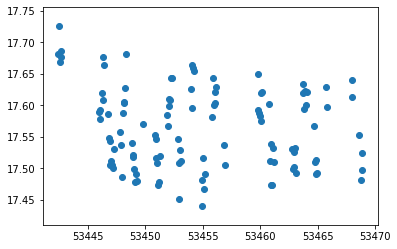

In [6]:
plt.scatter(mjd,mag)

In [7]:
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')
# add a line renderer with legend and line thickness
p.scatter(mjd, mag)

# show the results
show(p)

In [8]:
pdmplot = pd.read_csv('pdmplot.csv')
pdmplot['Period'] = 1./pdmplot['Frequency']

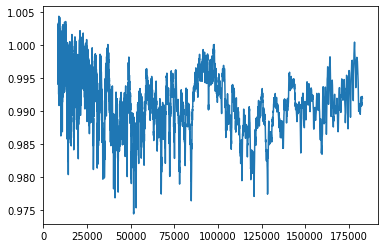

In [9]:
plt.plot(pdmplot['Period'],pdmplot['Theta'])

In [11]:
phaseddata = pd.read_csv('pdmcurve.csv')


In [12]:
phaseddata

,Phase(F=0.0000)(P=51715.538245)),Val-,Mean-,Sigma,Num
0,0.000000,-0.000000,-0.005125,0.000000,1092
1,0.001934,-0.000000,-0.005140,0.000000,1093
2,0.003867,-0.000000,-0.005155,0.000000,1094
3,0.005801,-0.000000,-0.005172,0.000000,1095
4,0.007735,-0.000000,-0.005190,0.000000,1096
...,...,...,...,...,...
2387,0.925504,-0.014142,-0.005259,0.014142,3479
2388,0.927438,-0.000000,-0.005250,0.000000,3480
2389,0.929371,-0.000000,-0.005240,0.000000,3481
2390,0.931305,-0.000000,-0.005230,0.000000,3482


In [10]:
print(phaseddata.columns)
ph = phaseddata.columns[0]
print(ph)

NameError: name 'phaseddata' is not defined

In [13]:
plt.scatter(phaseddata[ph],phaseddata['Val-'])
plt.gca().invert_yaxis()

NameError: name 'ph' is not defined

In [14]:
phasedata =phaseddata['Phase(F=0.5042)(P=1.983509))']
mag1 = -phaseddata['Val-']
mag = mag1 - np.mean(mag1)
# Fit the data using a Gaussian
g_init = models.Sine1D(amplitude=1., frequency=0.5, phase=0)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, phasedata,mag)

KeyError: 'Phase(F=0.5042)(P=1.983509))'

In [15]:
# Plot the data with the best-fit model
mag = mag + np.mean(mag1)


plt.figure(figsize=(8,5))
plt.plot(phasedata, mag, 'ko')
plt.scatter(phasedata, g(phasedata)+ np.mean(mag))
plt.xlabel('Position')
plt.ylabel('Flux')
plt.gca().invert_yaxis()

NameError: name 'mag1' is not defined

In [16]:
# Show the result

p = figure(plot_width=500, plot_height=500, title='',active_drag='pan', active_scroll='wheel_zoom',
           y_axis_label='Theta',x_axis_label='Period')

thetadic = {'theta':pdmplot['Theta'],
           'period':pdmplot['Period']}  


        #Tool to get wavelength
hover2 = HoverTool(
        tooltips=[
            ('Date', '(@period)')
        ]
    )
p.add_tools(hover2)
p.line(x='period',y='theta',source=thetadic)
show(p)

# Beta

In [84]:
beta = pd.read_csv('sig.csv')

In [85]:
beta

,Theta,Beta,Beta_bc
0,0.00,0.000000e+00,0.0
1,0.01,1.229130e-99,0.0
2,0.02,2.680660e-84,0.0
3,0.03,2.482450e-75,0.0
4,0.04,5.657330e-69,0.0
...,...,...,...
116,1.16,1.000000e+00,1.0
117,1.17,1.000000e+00,1.0
118,1.18,1.000000e+00,1.0
119,1.19,1.000000e+00,1.0


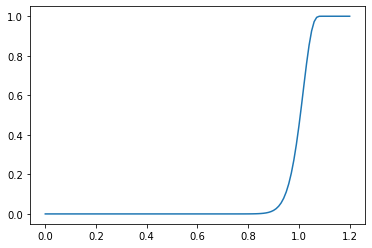

In [86]:
plt.plot(beta['Theta'],beta['Beta'])

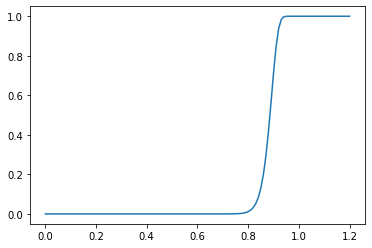

In [103]:
plt.plot(beta['Theta'],beta['Beta_bc'])

In [126]:
np.argmin(abs(beta['Theta'] - 0.136525))

14

In [132]:
beta['Beta'][13]

5.3096599999999995e-43

In [131]:
beta['Theta'][13]

0.13

In [133]:
beta['Theta'][14]

0.14

In [135]:
1.-(1-5.3*10**(-43))

0.0

In [142]:
from scipy.stats import beta

In [146]:
N = len(mag)
B = 10.
theta_pdm_best = 0.136525

x = ((N-B)/(B-1))*theta_pdm_best
prob_exceeds_val = beta.cdf(x, (N-B)/2.0, (B-1.0)/2.0)

In [147]:
prob_exceeds_val

1.0

In [145]:
x

1.5472833333333336

In [20]:
format(1.0-6.303752**(-42.))

'1.0'

In [3]:
from mpmath import mp  

In [41]:
mp.dps = 60
beta = mp.mpf('6.3e-42')
one = mp.mpf(1.)
m = mp.mpf(3.528241*10**2)
m = mp.mpf(26.4618*3.)
one - (one - beta)**m

mpf('5.00128020000000026355212774473720384875358348650217114900860545e-40')

In [42]:
mp.mpf('1') -mp.mpf('0.0000000000000000000000000000000000000000063')

mpf('0.999999999999999999999999999999999999999993700000000000000000024')

In [43]:
m

mpf('79.3854000000000041836756281554698944091796875')

In [44]:
one-(one-beta)**m

mpf('5.00128020000000026355212774473720384875358348650217114900860545e-40')

In [45]:
m

mpf('79.3854000000000041836756281554698944091796875')

In [15]:
from scipy.stats import beta
from mpmath import mp  

In [28]:
x = 0.1365249*((N-B)/(B-1))

N = 112.
B = 10.
prob_exceeds_val =beta.cdf(x, (N-B)/2.0, (B-1.0)/2.0)
print(prob_exceeds_val)

1.0


In [24]:
x

1.5472822000000002

In [29]:
3*26

78